In [14]:
import pandas as pd
import numpy as np
data=pd.read_csv('wheat.csv', index_col=0)

In [10]:
data.head()

,logprice,logwheat,wheat,price
year,,,,
1888,2.379546,1.327075,3.77,10.8
1889,2.351375,1.244155,3.47,10.5
1890,2.533697,1.275363,3.58,12.6
1891,2.415914,1.324419,3.76,11.2
1892,2.261763,1.319086,3.74,9.6


In [15]:
data['ma2'] = data['price'].rolling(2).mean()

In [26]:
data['ma3'] = data['price'].rolling(3).mean()
data['ma4'] = data['price'].rolling(4).mean()

In [16]:
data['ma5'] = data['price'].rolling(5).mean()

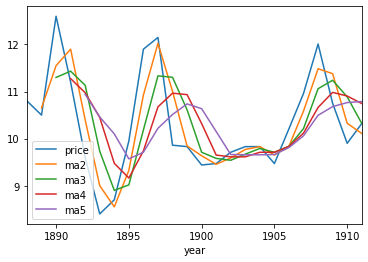

In [47]:
data[['price','ma2','ma3','ma4','ma5']].plot()

In [93]:
data['shares'] = [0 if (i < 1895 or data.loc[i,'ma2'] > data.loc[i,'ma5']) 
                  else 1
                 for i in data.index]

In [94]:
data['price1'] =  data['price'].shift(-1)

In [95]:
data['profit'] = [data.loc[i,'price1']-data.loc[i,'price'] 
                 if data.loc[i,'shares']==1
                 else 0 for i in data.index]

In [96]:
data['wealth']=data['profit'].cumsum()

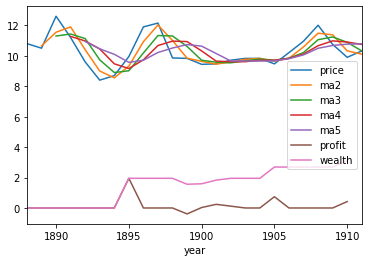

In [97]:
data[['price','ma2','ma3','ma4','ma5','profit','wealth']].plot()

In [98]:
data.tail()

,logprice,logwheat,wheat,price,ma2,ma5,shares,price1,profit,ma1,ma3,ma4,wealth
year,,,,,,,,,,,,,
1907,2.394252,1.205971,3.34,10.96,10.585,10.060,0,12.01,0.00,10.96,10.213333,10.1175,2.69
1908,2.485740,1.205971,3.34,12.01,11.485,10.496,0,10.75,0.00,12.01,11.060000,10.6625,2.69
1909,2.374906,1.316408,3.73,10.75,11.380,10.680,0,9.90,0.00,10.75,11.240000,10.9825,2.69
1910,2.292535,1.302913,3.68,9.90,10.325,10.766,1,10.32,0.42,9.90,10.886667,10.9050,3.11
1911,2.334084,1.258461,3.52,10.32,10.110,10.788,1,NaN,NaN,10.32,10.323333,10.7450,NaN


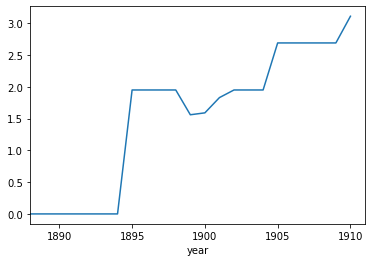

In [99]:
data['wealth'].plot()